# Guided Project: Investigating Fandango Movie Ratings

## 1. Introduction
In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this article — a great piece of data journalism that's totally worth reading.
Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.
<b>In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.</b>

## 2. Understanding the Data 

In [1]:
#Import Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import data sets
previous=pd.read_csv("fandango_score_comparison.csv")
after=pd.read_csv("movie_ratings_16_17.csv")

In [3]:
#EDA Dataset Previous Table
print(previous.shape)
print(previous.head(5))
print(previous.tail(5))

(146, 22)
                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0

In [4]:
#EDA Dataset Previous Columns
print(previous.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

Column	Definition
<li>FILM  >	The film in question
<li>RottenTomatoes >	The Rotten Tomatoes Tomatometer score for the film
<li>RottenTomatoes_User >	The Rotten Tomatoes user score for the film
<li>Metacritic >	The Metacritic critic score for the film
<li>Metacritic_User >	The Metacritic user score for the film
<li>IMDB >	The IMDb user score for the film
<li>Fandango_Stars >	The number of stars the film had on its Fandango movie page
<li>Fandango_Ratingvalue >	The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
<li>RT_norm >	The Rotten Tomatoes Tomatometer score for the film , normalized to a 0 to 5 point system
<li>RT_user_norm >	The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system
<li>Metacritic_norm >	The Metacritic critic score for the film, normalized to a 0 to 5 point system
<li>Metacritic_user_nom >	The Metacritic user score for the film, normalized to a 0 to 5 point system
<li>IMDB_norm >	The IMDb user score for the film, normalized to a 0 to 5 point system
<li>RT_norm_round >	The Rotten Tomatoes Tomatometer score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star
<li>RT_user_norm_round >	The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star
<li>Metacritic_norm_round >	The Metacritic critic score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
<li>Metacritic_user_norm_round >	The Metacritic user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
<li>IMDB_norm_round >	The IMDb user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
<li>Metacritic_user_vote_count >	The number of user votes the film had on Metacritic
<li>IMDB_user_vote_count >	The number of user votes the film had on IMDb
<li>Fandango_votes >	The number of user votes the film had on Fandango
<li>Fandango_Difference >	The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue

In [5]:
#EDA Dataset After Table
print(after.shape)
print(after.head(5))
print(after.tail(5))

(214, 15)
                     movie  year  metascore  imdb  tmeter  audience  fandango  \
0      10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1                 13 Hours  2016         48   7.3      50        83       4.5   
2      A Cure for Wellness  2016         47   6.6      40        47       3.0   
3          A Dog's Purpose  2017         43   5.2      33        76       4.5   
4  A Hologram for the King  2016         58   6.1      70        57       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60      4.50        3.95           4.0      3.5   
1         2.40    3.65      2.50        4.15           2.5      3.5   
2         2.35    3.30      2.00        2.35           2.5      3.5   
3         2.15    2.60      1.65        3.80           2.0      2.5   
4         2.90    3.05      3.50        2.85           3.0      3.0   

   nr_tmeter  nr_audience  
0        4.5          4.0  
1        2.5        

In [6]:
#EDA Dataset After Columns
print(after.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB
None


Column	Description

<li>movie >	the name of the movie
<li>year >	the release year of the movie
<li>metascore >	the Metacritic rating of the movie (the "metascore" - critic score)
<li>imdb >	the IMDB rating of the movie (user score)
<li>tmeter >	the Rotten Tomatoes rating of the movie (the "tomatometer" - critic score)
<li>audience >	the Rotten Tomatoes rating of the movie (user score)
<li>fandango >	the Fandango rating of the movie (user score)
<li>n_metascore >	the metascore normalized to a 0-5 scale
<li>n_imdb >	the IMDB rating normalized to a 0-5 scale
<li>n_tmeter >	the tomatometer normalized to a 0-5 scale
<li>n_audience >	the Rotten Tomatoes user score normalized to a 0-5 scale
<li>nr_metascore >	the metascore normalized to a 0-5 scale and rounded to the nearest 0.5
<li>nr_imdb >	the IMDB rating normalized to a 0-5 scale and rounded to the nearest 0.5
<li>nr_tmeter >	the tomatometer normalized to a 0-5 scale and rounded to the nearest 0.5
<li>nr_audience >	the Rotten Tomatoes user score normalized to a 0-5 scale and rounded to the nearest 0.5

Below we isolate only the columns that provide information about Fandango so we make the relevant data more readily available for later use. We'll make copies to avoid any SettingWithCopyWarning later on.

In [7]:
#Isolate the columns that offer information about Fandango's ratings in separate variables so we have just the data we're interested in more readily available for later use.
p_film=previous['FILM']
p_stars=previous['Fandango_Stars']
p_ratingvalue=previous['Fandango_Ratingvalue']
p_votes=previous['Fandango_votes']
p_difference=['Fandango_Difference']
a_movie=after['movie']
a_year=after['year']
a_fandango=after['fandango']


fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

Define the population of interest for our goal — remember that our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

population=movies analyzed by Hickey, these movies should have a above average score. The same movies should have a lower score after changing the Fandango rating system.


Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year.

Because we want to find out whether the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis — so we can compare the two states.

The data we're working with was sampled at the moments we want: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria:

The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
The movie must have had tickets on sale in 2015.
The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions for our other sample were (as it can be read in the README.md of the data set's repository):

The movie must have been released in 2016 or later.
The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).
This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.

## 3. Changing the Goal of our Analysis

At this point, we can either collect new data or change our the goal of our analysis. We choose the latter and place some limitations on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, <b>our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.</b>

## 4. Isolating the Samples We Need

With this new research goal, we have two populations of interest:

All Fandango's ratings for popular movies released in 2015.
All Fandango's ratings for popular movies released in 2016.
We need to be clear about what counts as popular movies. We'll use Hickey's benchmark of 30 fan ratings and count a movie as popular only if it has 30 fan ratings or more on Fandango's website.

Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [8]:
#Check if "PREVIOUS" sample contain popular movies — that is, check whether all (or at least most) sample points are movies with over 30 fan ratings on Fandango's website
print(p_votes.value_counts().sort_index())

#OR
print(sum(fandango_previous['Fandango_votes'] < 30))

35       1
36       1
38       2
41       2
42       1
43       2
46       1
48       1
50       1
51       1
54       1
55       1
56       1
59       1
63       1
64       1
66       2
70       1
74       1
79       1
83       2
95       1
99       1
110      1
118      1
121      1
124      1
127      1
162      1
192      1
        ..
6288     1
6437     1
6506     1
6757     1
6835     1
7025     1
7123     1
7705     1
8055     1
8077     1
8096     1
8357     1
8381     1
9363     1
9418     1
9443     1
9749     1
10509    1
12055    1
12640    1
13055    1
14846    1
14998    1
15205    1
15337    1
15749    1
33538    1
34085    1
34390    1
34846    1
Name: Fandango_votes, Length: 140, dtype: int64
0


In [9]:
#Check if "AFTER" sample contain popular movies — that is, check whether all (or at least most) sample points are movies with over 30 fan ratings on Fandango's website
fandango_after.sample(n=10,random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we used a value of 1 as the random seed. This is good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample.

As of April 2018, these are the fan ratings we found:

Movie	Fan ratings
Mechanic: Resurrection	2247
Warcraft	7271
Max Steel	493
Me Before You	5263
Fantastic Beasts and Where to Find Them	13400
Cell	17
Genius	127
Sully	11877
A Hologram for the King	500
Captain America: Civil War	35057
90% of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

If you explore the two data sets, you'll notice that there are movies with a releasing year different than 2015 or 2016. For our purposes, we'll need to isolate only the movies released in 2015 and 2016.

Let's start with Hickey's data set and isolate only the movies released in 2015. There's no special column for the releasing year, but we should be able to extract it from the strings in the FILM column.

In [10]:
fandango_previous.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [11]:
#Extract year from the strings in the FILM column, method 1
import re
def extract_years(text):
    return re.findall("[2][0][0-9][0-9]",text)
    #return re.findall("\(.+\)",text)

fandango_previous['Year']=fandango_previous['FILM'].apply(extract_years)

#Check results
fandango_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,[2015]
1,Cinderella (2015),5.0,4.5,12640,0.5,[2015]
2,Ant-Man (2015),5.0,4.5,12055,0.5,[2015]
3,Do You Believe? (2015),5.0,4.5,1793,0.5,[2015]
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,[2015]


In [12]:
#Extract year from the strings in the FILM column, method 2
fandango_previous['Year2'] = fandango_previous['FILM'].str[-5:-1]
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year,Year2
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,[2015],2015
1,Cinderella (2015),5.0,4.5,12640,0.5,[2015],2015


In [13]:
#Check Results
print(fandango_previous['Year2'].unique())
print(fandango_previous['Year2'].value_counts())
print(fandango_previous.info())

['2015' '2014']
2015    129
2014     17
Name: Year2, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 7 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
Year                    146 non-null object
Year2                   146 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 8.1+ KB
None


In [14]:
#Isolate the movies released in 2015 in a separate data set.
fandango_2015=fandango_previous[fandango_previous['Year2']=='2015'].copy()
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year,Year2
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,[2015],2015
1,Cinderella (2015),5.0,4.5,12640,0.5,[2015],2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,[2015],2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,[2015],2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,[2015],2015


In [15]:
#Isolate the movies released in 2016 in another separate data set.
fandango_after.head()
print(fandango_after.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
movie       214 non-null object
year        214 non-null int64
fandango    214 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB
None


In [16]:
fandango_2016=fandango_after[fandango_after['year']==2016].copy()

#Check Results
fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


In [17]:
#Check Results
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

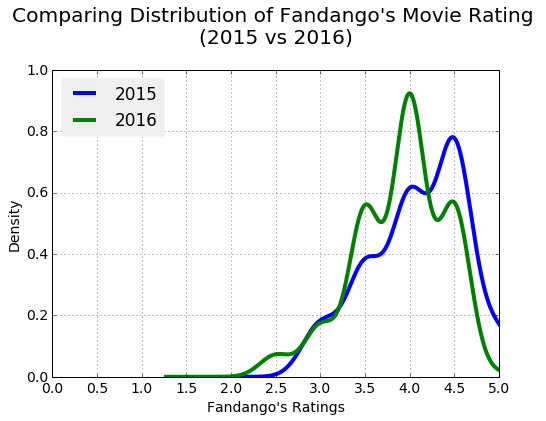

In [18]:
#Generate two kernel density plots on the same figure for the distribution of movie ratings of each sample. 
fig,ax=plt.subplots()
plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label='2015',legend=True,figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label='2016',legend=True)

plt.title("Comparing Distribution of Fandango's Movie Rating \n(2015 vs 2016)",y=1.07)
# the `y` parameter pads the title upward
plt.xlabel("Fandango's Ratings")
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

In [19]:
fandango_2016['fandango'].unique()

array([3.5, 4.5, 3. , 4. , 2.5, 5. ])

Analyze the two kernel density plots. Try to answer the following questions:

<li>Q1 What is the shape of each distribution?
The shape of 2015 had a left skewed distribution. While 2016 is more normal distributed
<li>Q2 How do their shapes compare?
2016 has also 2.0 rating's, this wasn't the case in 2015. Rating 4.0 has the highest density in 2016, in 2015 this was 4.5.
<li>Q3 If their shapes are similar, is there anything that clearly differentiates them?
The shapes are not similar.
<li>Q4 Can we see any evidence on the graph that suggests that there is indeed a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016?
Since the shape of the distribution is changed, one can conclude that the way Fandango rates is changed as well.
<li>Q5 Provided there's a difference, can we tell anything about the direction of the difference? In other words, were movies in 2016 rated lower or higher compared to 2015?
Movies were rated slightly lower in 2016 than in 2015.

<b>Two aspects are striking on the figure above:</b>

Both distributions are strongly left skewed.
The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.
The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a bit dubious. It'd be really interesting to investigate this further — ideally in a separate project, since this is quite irrelevant for the current goal of our analysis.

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.


# 6. Comparing Relative Frequencies

The kernel density plots from the previous screen showed that there's a clear difference between the two distributions. They also provided us with information about the direction of the difference: movies in 2016 were rated slightly lower than those in 2015.

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information.

In [20]:
#Examine the frequency distribution tables of the two distributions.

print('2015' + '\n' + '-' * 16) # To help us distinguish between the two tables immediately and
                                # avoid silly mistakes as we read to and fro
print(fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100)


print('2016' + '\n' + '-' * 16) # To help us distinguish between the two tables immediately and
                                # avoid silly mistakes as we read to and fro
print(fandango_2016['fandango'].value_counts(normalize=True).sort_index()*100)

2015
----------------
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64
2016
----------------
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


<li>Q1 The samples have different number of movies. Does it make sense to compare the two tables using absolute frequencies?
No, the relative frequencies are more useful.

<li>Q2 If absolute frequencies are not useful here, would relative frequencies be of more help? If so, what would be better for readability — proportions or percentages?
Percentages are prefered.

Analyze the two tables and try to answer the following questions:

<li>Q3 Is it still clear that there is a difference between the two distributions?
Yes.

<li>Q4 What can you tell about the direction of the difference just from the tables? Is the direction still that clear anymore?


In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

# Determining the Direction of the Change

We confirmed with the two tables before that there is indeed a clear difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel density plots.

We'll take a couple of summary statistics (remember the distinction between sample statistics and population parameters) to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [22]:
#Compute the mean, median, and mode for each distribution.
print('2015' + '\n' + '-' * 16) # To help us distinguish between the two tables immediately and
                                # avoid silly mistakes as we read to and fro
print('Mean')
print(fandango_2015['Fandango_Stars'].mean())
print('Median')
print(fandango_2015['Fandango_Stars'].median())
print('Mode')
print(fandango_2015['Fandango_Stars'].mode()[0])

print('2016' + '\n' + '-' * 16) # To help us distinguish between the two tables immediately and
                                # avoid silly mistakes as we read to and fro
print('Mean')
print(fandango_2016['fandango'].mean())
print('Median')
print(fandango_2016['fandango'].median())
print('Mode')
print(fandango_2016['fandango'].mode()[0])

2015
----------------
Mean
4.0852713178294575
Median
4.0
Mode
4.5
2016
----------------
Mean
3.887434554973822
Median
4.0
Mode
4.0


In [23]:
#Compute the mean, median, and mode for each distribution.
mean_2015=fandango_2015['Fandango_Stars'].mean()
median_2015=fandango_2015['Fandango_Stars'].median()
mode_2015=fandango_2015['Fandango_Stars'].mode()[0]

mean_2016=fandango_2016['fandango'].mean()
median_2016=fandango_2016['fandango'].median()
mode_2016=fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


Q. Compare these metrics and determine what they tell about the direction of the difference.
A. The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.


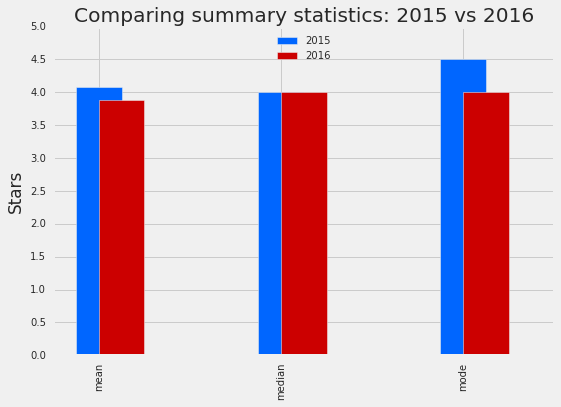

In [26]:
#Generate a grouped bar plot to show comparatively how the mean, median, and mode varied for 2015 and 2016.
import seaborn as sns
from numpy import arange
plt.style.use('fivethirtyeight')
plt.title("Comparing summary statistics: 2015 vs 2016")
summary['2015'].plot.bar(color = '#0066FF',align='center',label=2015, width = .25)
summary['2016'].plot.bar(color = '#CC0000',align='edge',label=2016, width = .25)
plt.ylabel("Stars")
plt.yticks(arange(0,5.1,.5))
plt.ylim(0,5)
plt.legend(loc="upper center")
plt.show()

In [25]:
(summary.iloc[0,1]-summary.iloc[0,0])/summary.iloc[0,0]

-0.04842683568951993

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

# Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.